In [240]:
import keras.layers
# Load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import plotly.express as px
#from wordcloud import WordCloud, STOPWORDS

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf # Deep Learning

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickbres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [241]:
df = pd.read_csv('Twitter_Data.csv') # Read the data only with the columns that we need
df2 = pd.read_csv('Reddit_Data.csv')
df2 = df2.rename(columns={'clean_comment': 'clean_text'})
df = pd.concat([df, df2])
df.reset_index(drop=True, inplace=True)
df.head() # Show the first 5 rows of the data

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [242]:
df.dropna(inplace=True) # Drop the missing values

In [243]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [244]:
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of posts')
fig.show()

In [245]:
# def wordcount_gen(df, category):
#     '''
#     Generating Word Cloud
#     inputs:
#        - df: tweets dataset
#        - category: Positive/Negative/Neutral
#     '''
#     # Combine all tweets
#     combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
# 
#     # Initialize wordcloud object
#     wc = WordCloud(background_color='white',
#                    max_words=50,
#                    stopwords = STOPWORDS)
# 
#     # Generate and plot wordcloud
#     plt.figure(figsize=(10,10))
#     plt.imshow(wc.generate(combined_tweets))
#     plt.title('{} Sentiment Words'.format(category), fontsize=20)
#     plt.axis('off')
#     plt.show()
# 
# # Positive tweet words
# wordcount_gen(df, 'Positive')
# 
# # Negative tweet words
# wordcount_gen(df, 'Negative')
# 
# # Neutral tweet words
# wordcount_gen(df, 'Neutral')


## Data Preprocessing

In [246]:
def post_to_words(post):
    ''' Convert tweet text into a sequence of words '''
    # convert to lower case
    text = post.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", post_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [247]:
# Apply data processing to each tweet
X = list(map(post_to_words, df['clean_text']))

In [248]:
# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [249]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [250]:
vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,
                               preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
X_train = count_vector.fit_transform(X_train).toarray()
X_val = count_vector.transform(X_val).toarray()
X_test = count_vector.transform(X_test).toarray()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [251]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    2  394   67 1956 1026   45 2254    1 1132  217    1  169   32
  143  100   57   60 1049  169   49    3    9  517    3   49 2525    3
 2462    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [252]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [269]:
# Correct approach with LabelEncoder for SparseCategoricalCrossentropy
Y = le.fit_transform(df['category'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [276]:
vocab_size = 5000
embedding_size = 32
epochs=15
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.9

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim= embedding_size, input_length=max_len, mask_zero=True),
    tf.keras.layers.Conv1D(filters=32,kernel_size= 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [277]:

optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adamOptimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model2.compile(
    optimizer = optimizer, # gradient descent algorithm
    loss =  tf.keras.losses.SparseCategoricalCrossentropy(), # loss function
    metrics = ['accuracy']
)

In [278]:
model2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 100, 32)           160000    
                                                                 
 conv1d_26 (Conv1D)          (None, 100, 32)           3104      
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 50, 32)            0         
 ng1D)                                                           
                                                                 
 bidirectional_27 (Bidirect  (None, 50, 64)            16640     
 ional)                                                          
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
 3 (GlobalAveragePooling1D)                                      
                                                     

In [279]:
batch_size = 64
history = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/15
1877/1877 [==============================] - 27s 14ms/step - loss: 0.9717 - accuracy: 0.5338 - val_loss: 0.9545 - val_accuracy: 0.5481
Epoch 2/15
1877/1877 [==============================] - 24s 13ms/step - loss: 0.7462 - accuracy: 0.6768 - val_loss: 0.5346 - val_accuracy: 0.8027
Epoch 3/15
1877/1877 [==============================] - 24s 13ms/step - loss: 0.5406 - accuracy: 0.8021 - val_loss: 0.4349 - val_accuracy: 0.8507
Epoch 4/15
1877/1877 [==============================] - 24s 13ms/step - loss: 0.4621 - accuracy: 0.8384 - val_loss: 0.4144 - val_accuracy: 0.8572
Epoch 5/15
1877/1877 [==============================] - 24s 13ms/step - loss: 0.4048 - accuracy: 0.8664 - val_loss: 0.3752 - val_accuracy: 0.8752
Epoch 6/15
1877/1877 [==============================] - 24s 13ms/step - loss: 0.3690 - accuracy: 0.8810 - val_loss: 0.3504 - val_accuracy: 0.8832
Epoch 7/15
1877/1877 [==============================] - 26s 14ms/step - loss: 0.3539 - accuracy: 0.8858 - val_loss: 0.3402 -

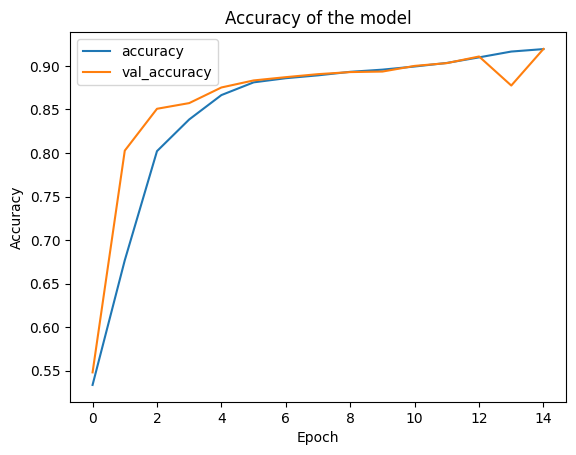

In [281]:
plt.plot(history.history['accuracy'], label='accuracy') # Plot the accuracy of the model on the train data
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # Plot the accuracy of the model on the validation data
plt.title('Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [282]:
model2.evaluate(X_test, y_test, verbose=1)

1251/1251 [==============================] - 3s 3ms/step - loss: 0.2651 - accuracy: 0.9207


[0.26506680250167847, 0.9207475781440735]